#1. 범죄 발생 밀도 vs 생활인구밀도

- 목적: 시간대별 생활인구 밀도와 범죄건수의 상관관계를 확인


- 시각화:

  *   산점도 (총범죄건수 vs. 내국_총생활인구밀도)
  
  *   시계열 선그래프: 시간대별 총범죄건수 & 내국_총생활 인구밀도 변화 추이

#1-1. 산점도
(총범죄건수 vs. 내국_총생활인구밀도)

In [68]:
# 1. 필수 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from google.colab import files

# 2. 나눔고딕 폰트 설치 (한글 폰트용)
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')  # 전역 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

# 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 4. 데이터 로드
df = pd.read_csv("전처리_시간대별_강력범죄_및_인구환경데이터.csv")

In [73]:
# 3. 원하는 색상 매핑 정의
colors = {
    '00시-06시': '#ffcccc',
    '06시-12시': '#ff6666',
    '12시-18시': '#cc0000',
    '18시-24시': '#800000'
}
# 5. 분석 대상 열 추출
subset_df = df[['시간대', '총범죄건수', '내국_총생활인구밀도']].copy()

In [70]:
print(subset_df)

       시간대  총범죄건수   내국_총생활인구밀도
0  00시-06시  54743  239613.3297
1  06시-12시  35169  245689.9019
2  12시-18시  45999  250198.4118
3  18시-24시  84721  243852.1900


In [71]:
print(subset_df['시간대'].value_counts())

시간대
00시-06시    1
06시-12시    1
12시-18시    1
18시-24시    1
Name: count, dtype: int64


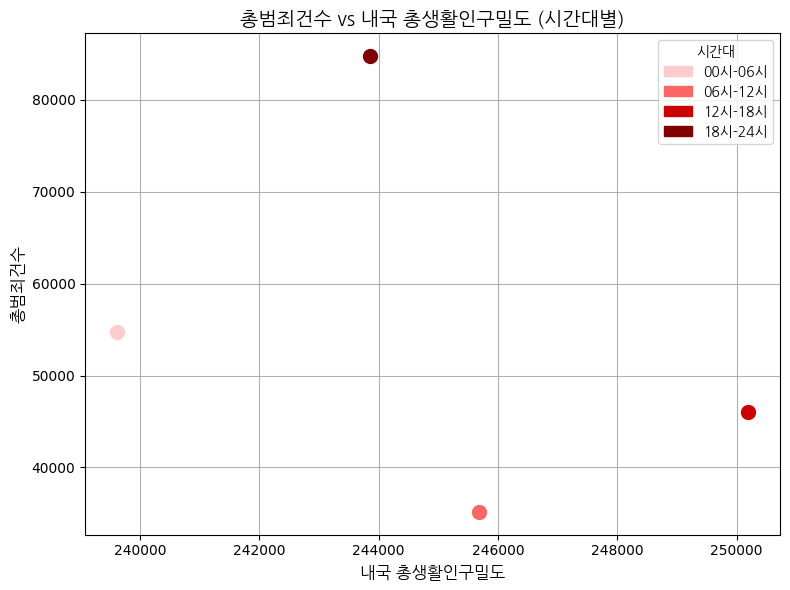

In [74]:
# 6. 산점도 시각화
plt.figure(figsize=(8, 6))
for 시간대, color in colors.items():
    temp = subset_df[subset_df['시간대'] == 시간대]
    plt.scatter(temp['내국_총생활인구밀도'], temp['총범죄건수'], label=시간대, color=color, s=100)


# 수동 범례 생성
legend_handles = [
    mpatches.Patch(color=color, label=label) for label, color in colors.items()
]
legend = plt.legend(
    handles=legend_handles,
    title="시간대",
    loc='best',
    fontsize=11,
    title_fontproperties=font_prop,
    prop=font_prop
)

# 제목, 축 한글
plt.title("총범죄건수 vs 내국 총생활인구밀도 (시간대별)", fontproperties=font_prop, fontsize=14)
plt.xlabel("내국 총생활인구밀도",fontproperties=font_prop, fontsize=12)
plt.ylabel("총범죄건수",fontproperties=font_prop, fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#(1-1) 인사이트
(1) 인구밀도와 범죄는 단순한 비례관계가 아니다
12시~18시는 인구가 가장 많지만 범죄는 적음

- 반면 18시~24시는 인구는 평균인데 범죄는 최고
→ 단순히 인구가 많다고 범죄가 많이 발생하지 않음

(2) 야간(18-24시)은 ‘범죄 집중 시간대’로 볼 수 있음
하루 중 범죄 발생량이 가장 많은 시간대는 18시~24시

- 조도 감소, 활동성 증가, 감시 약화 등의 외부 요인이 결합했을 가능성(데이터로 확인 필요)

- =>야간 순찰 강화, CCTV 추가 설치, 조도 확보 정책 등이 이 시간대에 필요함

(3) 06~12시 시간대는 치안상 상대적으로 안전
인구수는 두 번째로 많지만, 범죄 발생은 가장 낮음

- 학교·직장 이동 시간대 + 낮 시간대로서 사회적 감시 효과가 클 수 있음

(4) 00~06시는 예상보다 높은 범죄 발생
인구는 가장 적지만, 범죄는 꽤 높은 편

- 취약 시간대(심야)로, 적은 인원이라도 범죄에 노출되기 쉬운 구조 가능성

- =>심야 귀가길 안전, 심야 택시/도보 구간 보안 강화 등 대응이 필요

#(1-2) 시계열 선그래프:
시간대별 총범죄건수 & 내국_총생활 인구밀도 변화 추이

In [23]:
print(subset_df['시간대'].unique())

['00시-06시' '06시-12시' '12시-18시' '18시-24시']


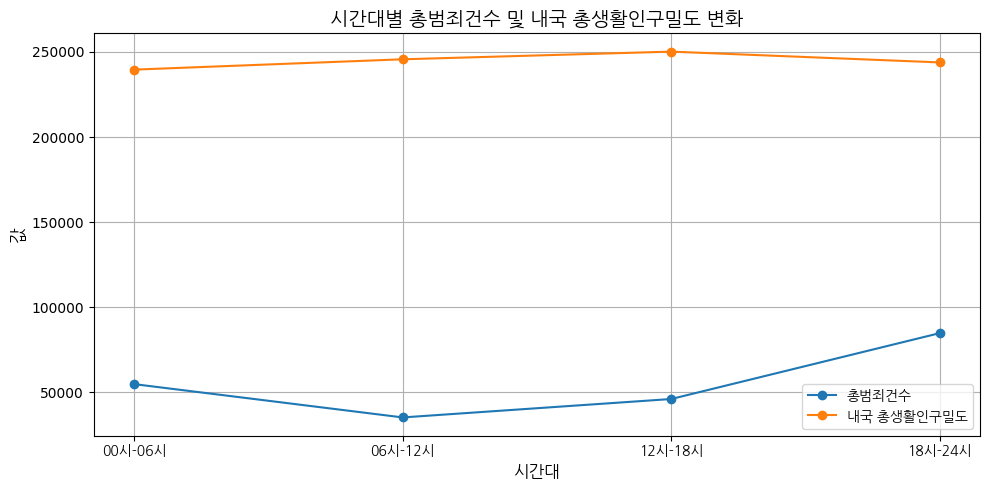

📌 총범죄건수 vs 내국 총생활인구밀도 상관계수:
               총범죄건수  내국_총생활인구밀도
총범죄건수       1.000000   -0.332559
내국_총생활인구밀도 -0.332559    1.000000


In [27]:
# 7. 시간대 순서를 위한 정렬 처리
시간대순서 = ['00시-06시', '06시-12시', '12시-18시', '18시-24시']
subset_df['시간대순서'] = subset_df['시간대'].apply(lambda x: 시간대순서.index(x))
subset_df_sorted = subset_df.sort_values('시간대순서')

# 8. 선그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(subset_df_sorted['시간대순서'], subset_df_sorted['총범죄건수'], marker='o', label='총범죄건수')
plt.plot(subset_df_sorted['시간대순서'], subset_df_sorted['내국_총생활인구밀도'], marker='o', label='내국 총생활인구밀도')
plt.xticks(subset_df_sorted['시간대순서'], subset_df_sorted['시간대'], rotation=0, fontproperties=font_prop)
plt.title("시간대별 총범죄건수 및 내국 총생활인구밀도 변화", fontproperties=font_prop, fontsize=14)
plt.xlabel("시간대",fontproperties=font_prop,  fontsize=12)
plt.ylabel("값",fontproperties=font_prop, fontsize=12)
plt.grid(True)

# 8. 선그래프 시각화
import matplotlib.lines as mlines

# ✅ 수동 범례 삽입
legend_handles = [
    mlines.Line2D([], [], color='tab:blue', marker='o', label='총범죄건수'),
    mlines.Line2D([], [], color='tab:orange', marker='o', label='내국 총생활인구밀도')
]
plt.legend(handles=legend_handles, fontsize=11, prop=font_prop)

plt.tight_layout()
plt.show()

# 9. 상관계수 출력
correlation = subset_df[['총범죄건수', '내국_총생활인구밀도']].corr()
print("📌 총범죄건수 vs 내국 총생활인구밀도 상관계수:")
print(correlation)

#(1-2) 인사이트
- 범죄는 인구밀도와 비례하지 않는다
- 18시~24시 시간대는 범죄 발생의 위험구간
- 상관계수 분석 결과: 약한 음의 상관
총범죄건수 vs 내국 생활인구밀도 간 상관계수 ≈ -0.33

  - 통계적으로 강하진 않지만, 인구가 많을수록 범죄가 줄어드는 경향을 보여줌

  - 이는 활동 인구의 눈이 많을수록 범죄 억제 효과가 있을 가능성을 시사



#2. 환경 변수(조도, 소음)와 범죄 간 관계 분석
- 목적: 조도(lux), 소음(dB)이 범죄 발생과 관련이 있는지 탐색
- 가능 분석:

  - 시간대별 조도 및 소음이 높거나 낮을 때 특이하게 증가하는 범죄유형은?

  - 조도/소음과 범죄 비율 간 상관계수 히트맵

#(2-1). 조도 vs 범죄

In [41]:
# 1. 필수 라이브러리 설치 및 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [75]:
df=pd.read_csv("전처리_시간대별_강력범죄_및_인구환경데이터.csv")

In [76]:
# 4. 분석에 필요한 열만 추출
env_df = df[['시간대', '총범죄건수', '조도 평균(lux)', '소음 평균(dB)']].copy()
env_df['시간대순서'] = [0, 1, 2, 3]  # 시간대 순서 부여 (00-06시 ~ 18-24시)

In [46]:
print(env_df)

       시간대  총범죄건수  조도 평균(lux)  소음 평균(dB)  시간대순서
0  00시-06시  54743    0.000000   0.000000      0
1  06시-12시  35169    0.388069   0.709473      1
2  12시-18시  45999    1.000000   1.000000      2
3  18시-24시  84721    0.051943   0.840692      3


In [77]:
# ⬛ 색상 수동 지정 (시간대)
시간대_색상 = {
    '00시-06시': '#ffcccc',
    '06시-12시': '#ff6666',
    '12시-18시': '#cc0000',
    '18시-24시': '#800000'
}

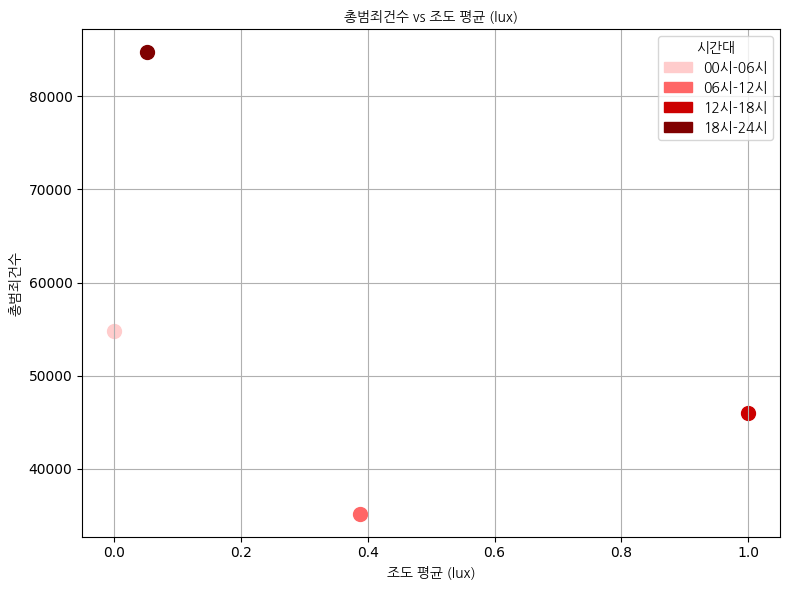

In [78]:
# 5. 산점도: 조도 평균 vs 총범죄건수 (수동 범례)
plt.figure(figsize=(8, 6))
for 시간대, 색 in 시간대_색상.items():
    data = env_df[env_df['시간대'] == 시간대]
    plt.scatter(data['조도 평균(lux)'], data['총범죄건수'], color=색, s=100, label=시간대)

plt.title("총범죄건수 vs 조도 평균 (lux)", fontsize=14, fontproperties=font_prop)
plt.xlabel("조도 평균 (lux)", fontproperties=font_prop)
plt.ylabel("총범죄건수", fontproperties=font_prop)
plt.grid(True)

legend_handles = [mpatches.Patch(color=색, label=시간대) for 시간대, 색 in 시간대_색상.items()]
plt.legend(handles=legend_handles, title="시간대", fontsize=11, prop=font_prop, title_fontproperties=font_prop)
plt.tight_layout()
plt.show()



#(2-1).인사이트_조도 vs. 범죄
- 조도가 낮을수록 범죄 발생이 많음
- 18시~24시는 조도는 거의 0에 가까우면서, 범죄 발생건수는 가장 높음
- 조도 평균이 높은 06시-12시(🟠), 12시-18시(🔴) 시간대는 총범죄건수가 낮거나 중간수준에 머무름

- 주간 시간대(밝은 환경)는 비교적 안전함
- "조도"는 범죄 억제의 중요한 환경 요인
- 시각적 가시성이 확보되는 낮에는 범죄 발생이 억제

- 반면 어두운 밤 시간대에는 사각지대, 은폐성 증가로 범죄 가능성이 높아짐

- 이 그래프는 **"조도와 범죄 간 음의 상관관계"**를 뚜렷하게 보여줌

#(2-2). 소음 vs. 범죄

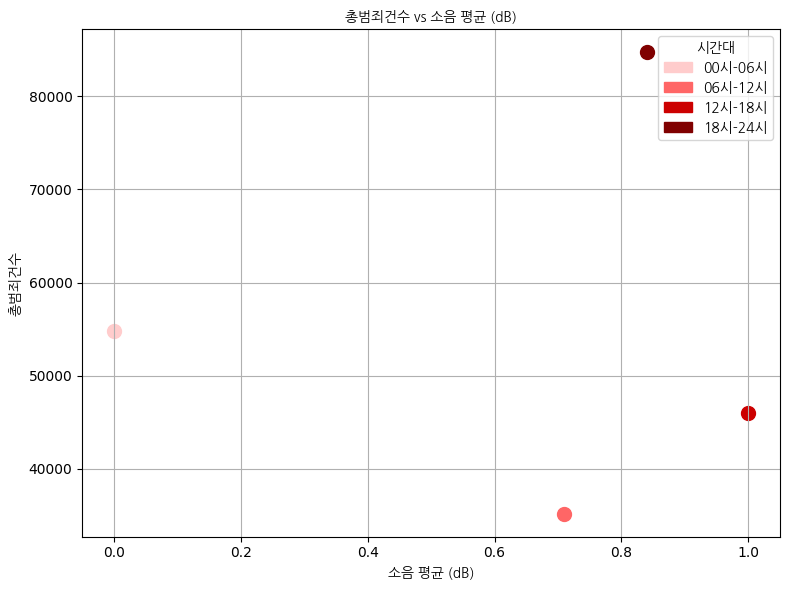

In [79]:
# 7. 산점도: 소음 평균 vs 총범죄건수 (수동 범례)
plt.figure(figsize=(8, 6))
for 시간대, 색 in 시간대_색상.items():
    data = env_df[env_df['시간대'] == 시간대]
    plt.scatter(data['소음 평균(dB)'], data['총범죄건수'], color=색, s=100, label=시간대)

plt.title("총범죄건수 vs 소음 평균 (dB)", fontsize=14, fontproperties=font_prop)
plt.xlabel("소음 평균 (dB)", fontproperties=font_prop)
plt.ylabel("총범죄건수", fontproperties=font_prop)
plt.grid(True)

legend_handles = [mpatches.Patch(color=색, label=시간대) for 시간대, 색 in 시간대_색상.items()]
plt.legend(handles=legend_handles, title="시간대", fontsize=11, prop=font_prop, title_fontproperties=font_prop)
plt.tight_layout()
plt.show()

#(2-2).인사이트_소음 vs.범죄
- 소음이 높은 시간대가 반드시 범죄율이 높은 것은 아님
- 소음이 낮은 시간대에도 범죄는 증가 가능
- 소음과 범죄 간 상관관계는 약함

#상관계수 | 범죄 vs. 소음 / 조도

In [58]:
# 상관계수 도출을 위한 관련 열만 추출
corr_df = env_df[['총범죄건수', '조도 평균(lux)', '소음 평균(dB)']].copy()

# 상관계수 행렬 계산 (피어슨 상관계수)
correlation_matrix = corr_df.corr(method='pearson')

# 출력
print("📌 총범죄건수 vs 조도 및 소음 평균 상관계수:")
print(correlation_matrix)

# 개별 상관계수만 따로 출력면:
print("\n👉 조도 vs 총범죄건수:", correlation_matrix.loc['총범죄건수', '조도 평균(lux)'])
print("👉 소음 vs 총범죄건수:", correlation_matrix.loc['총범죄건수', '소음 평균(dB)'])

📌 총범죄건수 vs 조도 및 소음 평균 상관계수:
               총범죄건수  조도 평균(lux)  소음 평균(dB)
총범죄건수       1.000000   -0.523889   0.053711
조도 평균(lux) -0.523889    1.000000   0.658271
소음 평균(dB)   0.053711    0.658271   1.000000

👉 조도 vs 총범죄건수: -0.5238885810109575
👉 소음 vs 총범죄건수: 0.05371101251627765


#3-1.총범죄건수 vs 조도 및 소음 평균 상관계수:
👉 조도 vs 총범죄건수: -0.5238885810109575
-  중간 정도의 음의 상관관계 → 조도가 낮을수록 범죄가 증가

👉 소음 vs 총범죄건수: 0.05371101251627765
- 거의 무관 (상관관계 없음)

- 조도는 범죄 억제에 일정한 영향이 있다
- 조도 평균과 총범죄건수 간 상관계수 -0.52는 조명이 어두워질수록 범죄 발생 가능성이 증가하는 경향을 의미.


👉 조도 vs 소음 간 상관계수 +0.66
- 낮(조도 높음)에 활동량이 많아 소음도 증가하는 자연스러운 패턴

#3-2. 상관계수 | 범죄 vs. 시간대
-  총범죄건수 vs 시간대 간 상관계수:0.6115

In [64]:
import pandas as pd

In [66]:
df = pd.read_csv("전처리_시간대별_강력범죄_및_인구환경데이터.csv")

# 4. 필요한 열만 추출
env_df = df[['시간대', '총범죄건수']].copy()

# 5. 시간대 순서 정의 및 수치형으로 변환
시간대순서 = {
    '00시-06시': 0,
    '06시-12시': 1,
    '12시-18시': 2,
    '18시-24시': 3
}
env_df['시간대_코드'] = env_df['시간대'].map(시간대순서)

In [67]:
# 6. 결측치 제거
valid_df = env_df[['총범죄건수', '시간대_코드']].dropna()

# 7. 상관계수 계산
correlation = valid_df.corr().loc['총범죄건수', '시간대_코드']

# 8. 출력
print("📌 총범죄건수 vs 시간대 간 상관계수:")
print(f"{correlation:.4f}")

📌 총범죄건수 vs 시간대 간 상관계수:
0.6115


<인사이트>
- 시간대가 수치로 00시-06시 = 0, 18시-24시 = 3 등으로 부여되었기 때문에 이 상관계수는 시간이 늦어질수록 범죄가 증가하는 경향
- 시간대가 뒤로 갈수록 총범죄건수가 증가하는 경향이 있음